In [23]:
from solution_3_tabulation import get_longest_common_substring, solve

input_data = [
    (1, "ababbacdee", "haababadeedc"),
    (2, "Thisisadocumentcontainingpatienthistory", "Theletteringinthisstoryisquite unique"),
    (3, "abcdefgxyz123", "xyz789abcdef"),
    (4, "The adventurous cat explored the mysterious cave.", "A curious cat ventured into the dark cave for exploration."),
    (5, "Sunflowers bloomed in the radiant sunlight.", "Radiant sunlight illuminated the field of blooming sunflowers."),
    (6, "Gentle waves lapped against the sandy shore.", "The shore echoed with the soothing sounds of lapping waves.")
]
result_table = solve(input_data)
print(result_table)

[(1, 'abab'), (2, 'nthis'), (3, 'abcdef'), (4, 'ous cat '), (5, 'adiant sunlight'), (6, ' waves')]


In [24]:
import pandas as pd

# Data
input_df = pd.DataFrame(input_data)
input_df.head(20)

,0,1,2
0,1,ababbacdee,haababadeedc
1,2,Thisisadocumentcontainingpatienthistory,Theletteringinthisstoryisquite unique
2,3,abcdefgxyz123,xyz789abcdef
3,4,The adventurous cat explored the mysterious cave.,A curious cat ventured into the dark cave for ...
4,5,Sunflowers bloomed in the radiant sunlight.,Radiant sunlight illuminated the field of bloo...
5,6,Gentle waves lapped against the sandy shore.,The shore echoed with the soothing sounds of l...


In [25]:
result_df = pd.DataFrame(data=result_table)
result_df.head(20)

,0,1
0,1,abab
1,2,nthis
2,3,abcdef
3,4,ous cat
4,5,adiant sunlight
5,6,waves


In [26]:
result, states = get_longest_common_substring(
    "ababbacdee",
    "haababadeedc",
    is_state_record=True
)
print(result)


abab


In [27]:
from typing import List, Tuple
import seaborn as sns
import matplotlib.pyplot as plt


def plot_table(iteration: int, str1: str, str2: str, str1_idx: int, str2_idx: int, table: List[List[int]], max_length: int, max_substring_pos: Tuple[int,int]):
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(table, annot=True, fmt="d", cmap="YlGnBu", cbar=False, linewidths=0.5, linecolor='black')

    ax.text(9.5, 1.0, f'max_length={max_length}', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.8, 'pad': 10})
    ax.text(9.5, 2.0, f'max_substring_pos={max_substring_pos}', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.8, 'pad': 10})
    ax.text(9.5, 3.0, f'longest_common_substring={str1[max_substring_pos[0]-max_length: max_substring_pos[0]]}', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.8, 'pad': 10})

    # Display line for index
    plt.axhline(y=str1_idx+1+0.5, color='lightcoral', linewidth=2)
    plt.axvline(x=str2_idx+1+0.5, color='lightcoral', linewidth=2)
    
    # Custom y-axis labels
    y_labels = list('$') + list(str1)
    y_ticks_positions = [i + 0.5 for i in range(len(y_labels))]
    x_labels = list('$') + list(str2)
    x_ticks_positions = [i + 0.5 for i in range(len(x_labels))]
    plt.yticks(ticks=y_ticks_positions, labels=y_labels, rotation=0)
    ax.xaxis.tick_top()
    plt.xticks(ticks=x_ticks_positions, labels=x_labels, rotation=0)
    
    plt.title(f"[Question 3] Iteration {iteration}")
    plt.show()

### 2 State variables
- i >> index of string str1
- j >> index of string str2
- table >> store the **longest common substring length that ends with given i,j position**
- max_length >> max length of longest common substring so far
- max_substring_pos >> the i, j of longest common substring substring so far


## This is dynamic programming problem
There are 2 approuches to solve this probelm. 

## Pseudo code
- given the input `str1` and `str2`
- create `table` with padding and fill with 0
- for loop over each position in `str` and `str2` using `i`, and `j` as index
  - if char at position `i` and `j` are not equal
    - set the `table[i][j]` to be zero because longest common substring length that ends at this position is 0
  - else
    - get the `local_max_length` from the position `[i-1][j-1]` and then + 1
    - if `local_max_length` is greater that `max_length`
      - update `max_length` to be `local_max_length`
      - update `max_substring_pos`
- > return the substring from `max_length` and `max_substring_pos`


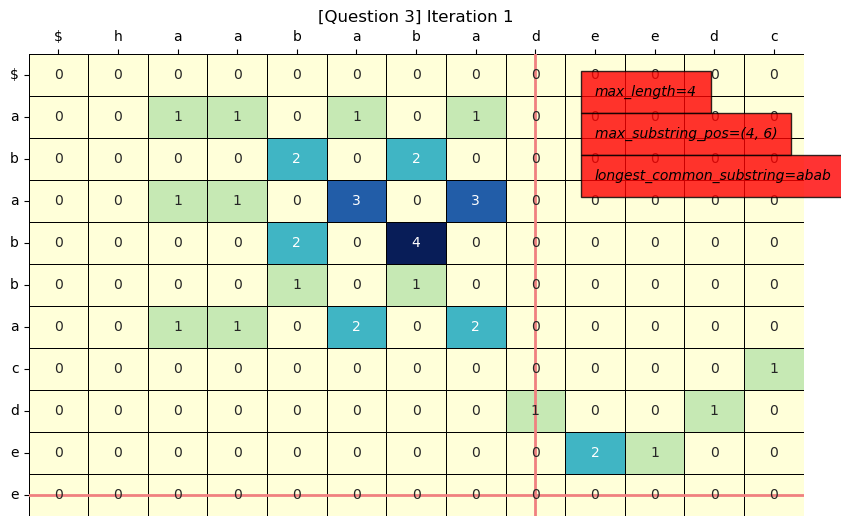

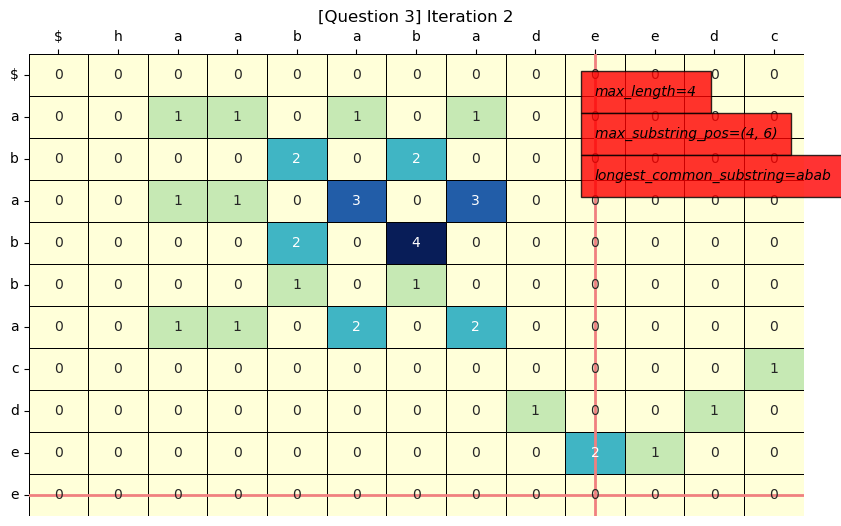

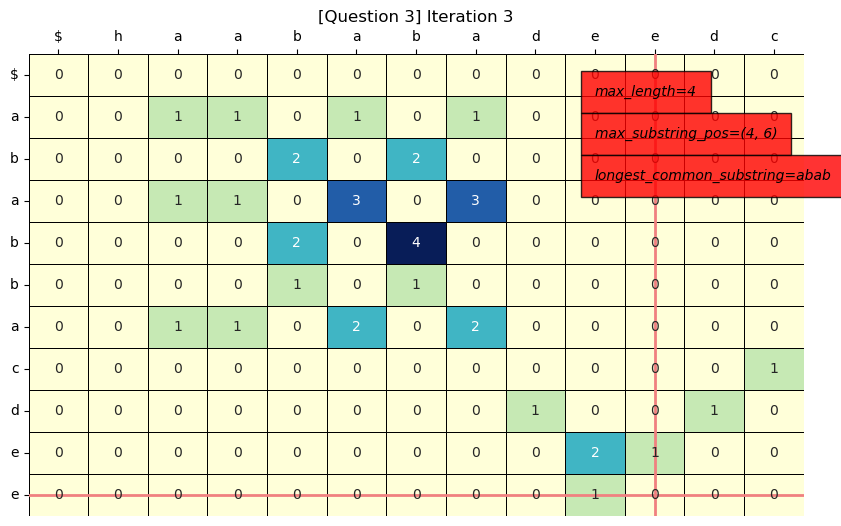

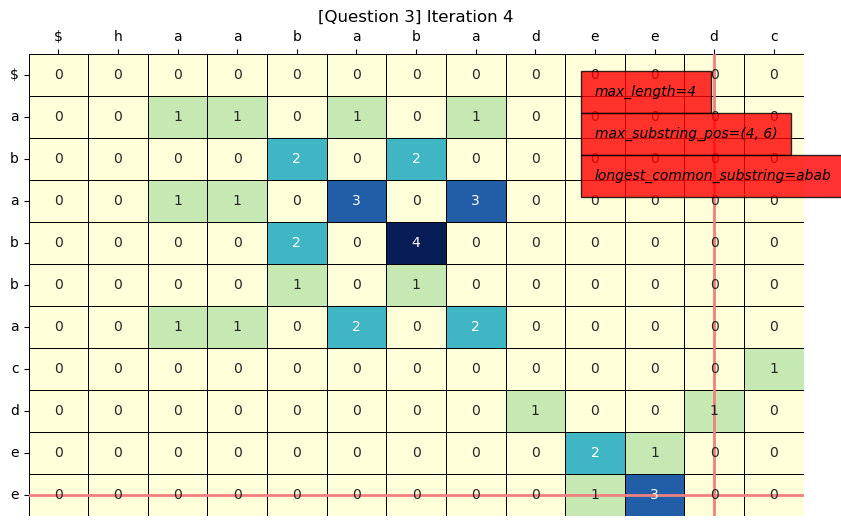

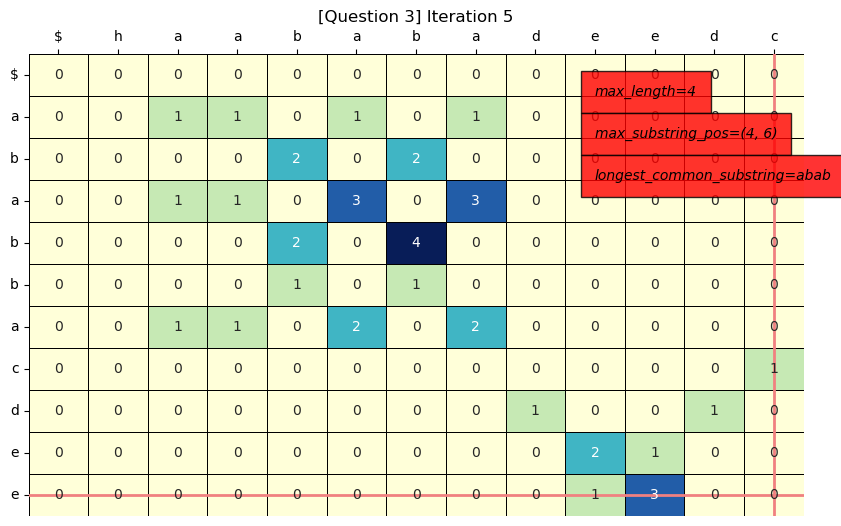

In [28]:
import dataclasses

for iter, state in enumerate(states[-5:], 1):
    str1, str2, str1_idx, str2_idx, table, max_length, max_substring_pos = dataclasses.astuple(state)
    plot_table(iter, str1, str2, str1_idx, str2_idx, table, max_length, max_substring_pos)